# Analisis de Datos del Grupo G
## Universidad de Flores y Universidad de Villa María



In [1]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors

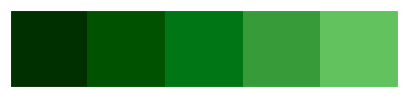

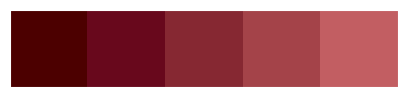

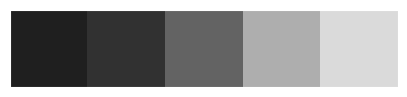

In [2]:
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = ["#61C25E","#379B3A","#007615","#005200","#003000"][::-1]
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#C25E62","#A44349","#862832","#68081C","#4C0000"][::-1]
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

In [3]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoA_flores_universidad'
university1_name = 'Universidad de Flores'

university2 = 'GrupoA_villa_maria_universidad'
university2_name = 'Universidad de Villa María'



In [4]:
df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')

In [30]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [25]:
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None,on_bad_lines='skip')

In [28]:
df_geonames.dropna(axis=1, inplace=True)

In [31]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [36]:
df_geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [37]:
df_geonames_merge

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,gender,age,location_y,email
0,AR,6200,REALICO,La Pampa,L,-35.0333,-64.2500,4.0,universidad de flores,licenciatura en kinesiología y fisiatría,2020-11-01,chelsea taylor,female,21,REALICO,michael67@gmail.com
1,AR,1633,EMPALME,Buenos Aires,B,-34.4333,-59.0000,4.0,universidad de flores,ingeniería en informática,2020-12-09,daniel brown,male,21,EMPALME,khodges@gmail.com
2,AR,1633,FATIMA,Buenos Aires,B,-34.4333,-59.0000,4.0,universidad de flores,ingeniería en informática,2020-12-09,daniel brown,male,21,EMPALME,khodges@gmail.com
3,AR,1633,MANZONE,Buenos Aires,B,-34.4833,-58.8667,4.0,universidad de flores,ingeniería en informática,2020-12-09,daniel brown,male,21,EMPALME,khodges@gmail.com
4,AR,1633,EMPALME,Buenos Aires,B,-34.4333,-59.0000,4.0,universidad de flores,licenciatura en ciencias biológicas,2020-09-23,john powell,male,54,EMPALME,joshua48@yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16268,AR,4195,TALA BAJADA,Tucuman,T,-26.2833,-64.4750,3.0,universidad de flores,licenciatura en ciencias de la educación,2020-09-20,cynthia lewis,female,59,7 DE ABRIL,tuckermelanie@hotmail.com
16269,AR,4195,LAS COLAS,Tucuman,T,-26.2833,-64.4750,3.0,universidad de flores,licenciatura en ciencias de la educación,2020-09-20,cynthia lewis,female,59,7 DE ABRIL,tuckermelanie@hotmail.com
16270,AR,4195,POZO GRANDE,Tucuman,T,-26.2833,-64.4750,3.0,universidad de flores,licenciatura en ciencias de la educación,2020-09-20,cynthia lewis,female,59,7 DE ABRIL,tuckermelanie@hotmail.com
16271,AR,4195,POZO LARGO,Tucuman,T,-26.2833,-64.4750,3.0,universidad de flores,licenciatura en ciencias de la educación,2020-09-20,cynthia lewis,female,59,7 DE ABRIL,tuckermelanie@hotmail.com


## TOP 10 de universidades con más alumnos

52.515151515151516

/tmp/ipykernel_2977016/3072236377.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


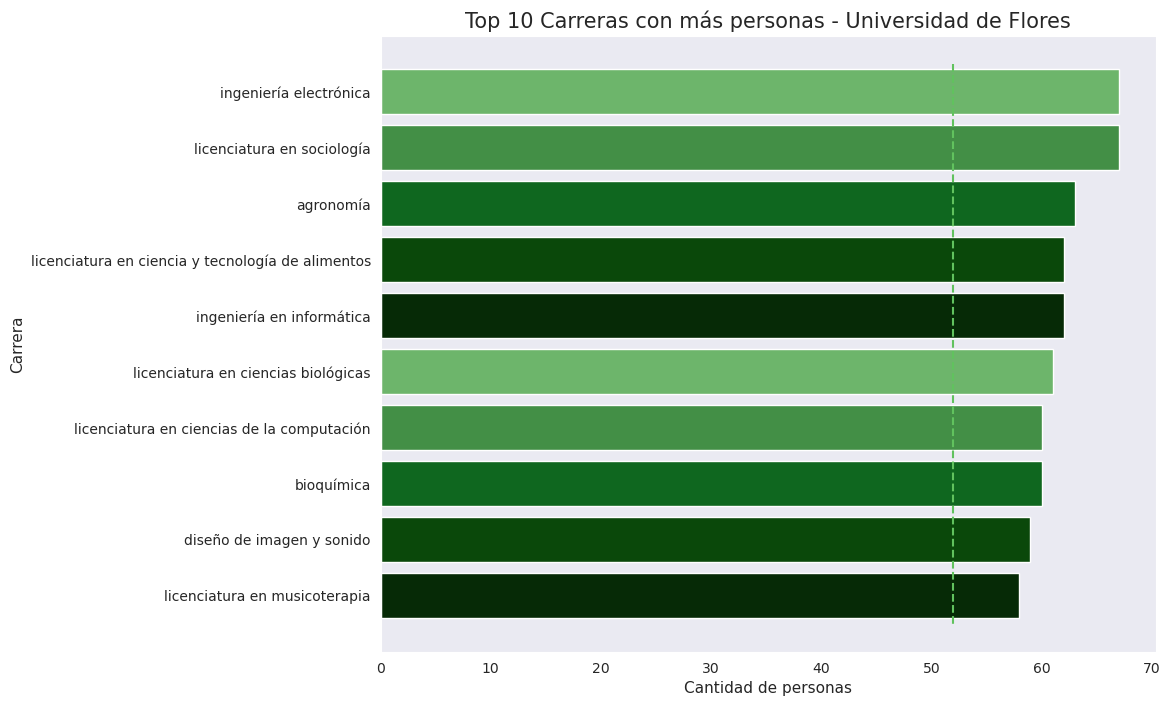

In [97]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[0],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

/tmp/ipykernel_2977016/1886307504.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


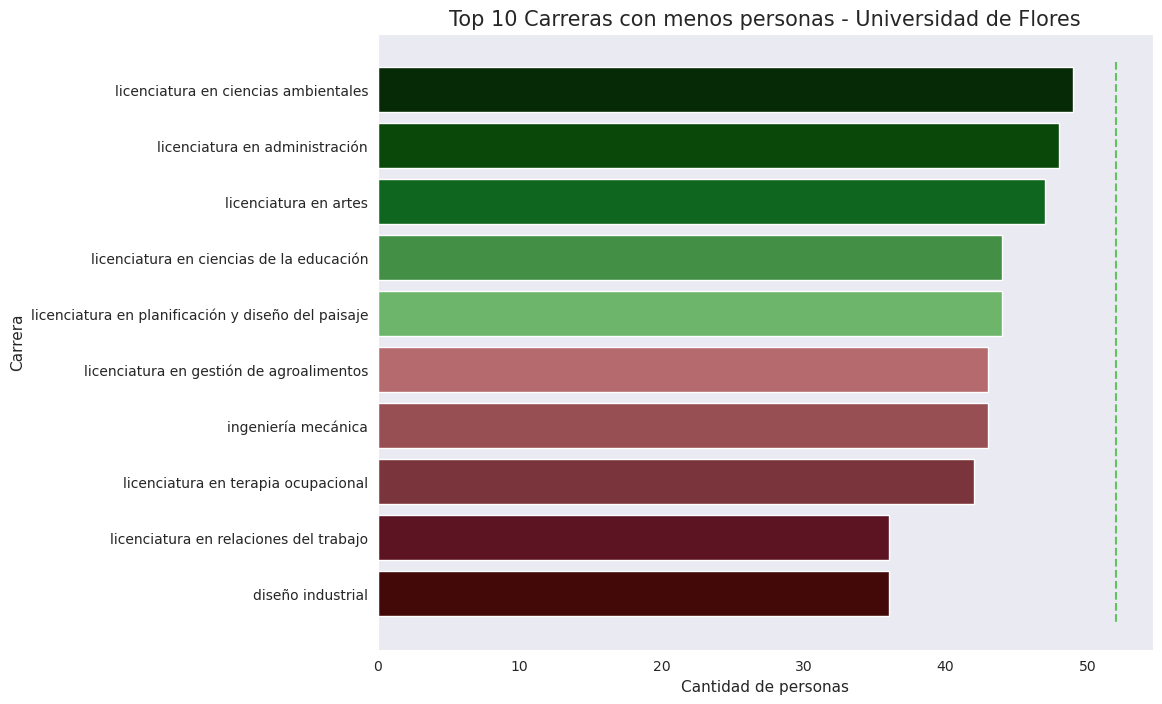

In [96]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=(colors_green[::-1]+colors_red[::-1]), ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[0],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

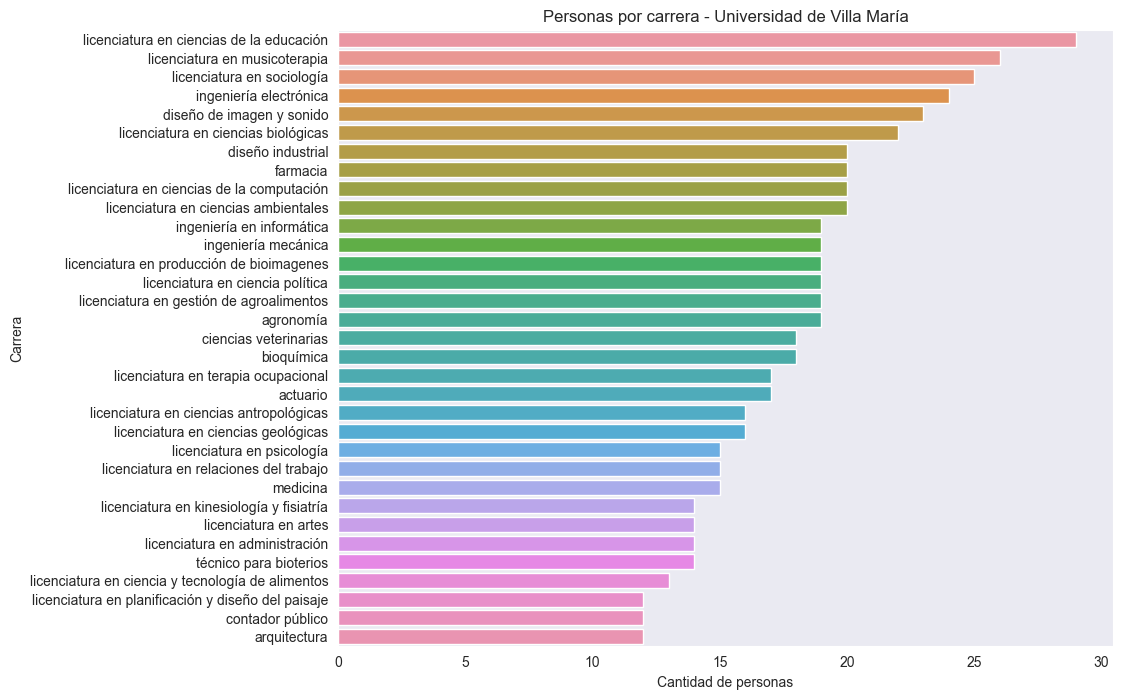

In [ ]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career')

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

In [ ]:
df_1.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [ ]:
df_1.shape

(1733, 9)

In [ ]:
df_1.head()

,university,career,inscription_date,first_name,gender,age,postal_code,location,email
0,universidad de flores,licenciatura en kinesiología y fisiatría,2020-11-01,chelsea taylor,female,21,6200,REALICO,michael67@gmail.com
1,universidad de flores,ingeniería en informática,2020-12-09,daniel brown,male,21,1633,EMPALME,khodges@gmail.com
2,universidad de flores,licenciatura en ciencias biológicas,2020-09-23,john powell,male,54,1633,EMPALME,joshua48@yahoo.com
3,universidad de flores,licenciatura en ciencia y tecnología de alimentos,2020-11-03,rachel wade,female,21,1633,EMPALME,jortiz@hotmail.com
4,universidad de flores,licenciatura en ciencias antropológicas,2020-09-11,amy scott,female,31,5777,ADOLFO RODRIGUEZ SAA,dmadden@hotmail.com


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1733 non-null   object
 1   career            1733 non-null   object
 2   inscription_date  1733 non-null   object
 3   first_name        1733 non-null   object
 4   gender            1733 non-null   object
 5   age               1733 non-null   int64 
 6   postal_code       1733 non-null   int64 
 7   location          1733 non-null   object
 8   email             1733 non-null   object
dtypes: int64(2), object(7)
memory usage: 122.0+ KB


In [ ]:
df_1.describe()

,age,postal_code
count,1733.000000,1733.000000
mean,35.808425,4890.144259
std,19.083208,2220.970797
min,19.000000,1601.000000
25%,21.000000,3027.000000
50%,22.000000,4728.000000
75%,51.000000,6537.000000
max,79.000000,9421.000000


In [ ]:
df_2.describe()

,age,postal_code
count,595.000000,595.000000
mean,24.752941,4734.013445
std,7.893726,2076.609956
min,19.000000,1602.000000
25%,21.000000,2848.000000
50%,21.000000,4655.000000
75%,21.000000,6420.000000
max,50.000000,9225.000000


<AxesSubplot: xlabel='gender', ylabel='age'>

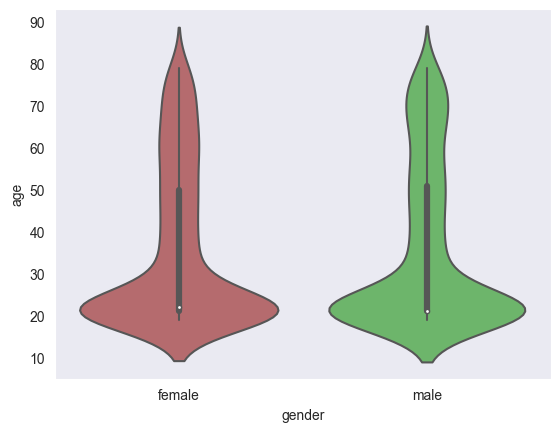

In [ ]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

### top 10 localidades por alumnos

In [ ]:
df_1.location.value_counts().head(10)

ALBARRACIN          7
COLONIA HANSEN      5
AVELLANEDA          5
EL SOCORRO          5
CAMPO GARAY         5
COLONIA JAUREGUI    5
ALTO BLANCO         5
ARMSTRONG           5
ARROYO QUILLA       5
BAHIA BUSTAMANTE    5
Name: location, dtype: int64

In [ ]:
df_2.location.value_counts().head(10)

ATREUCO      6
AGUADA       5
ACOSTILLA    5
ALBIGASTA    5
BENITEZ      4
ALONGO       4
PILAR        4
ANGUIL       4
ANDALUCIA    4
FLORIDA      4
Name: location, dtype: int64

### distribucion de alumnos por edad y género

<AxesSubplot: xlabel='age', ylabel='Density'>

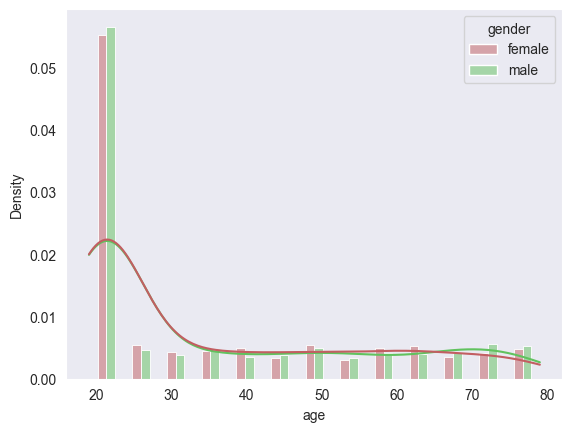

In [ ]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])

In [ ]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)

### inscripciones por mes

<AxesSubplot: xlabel='inscription_date'>

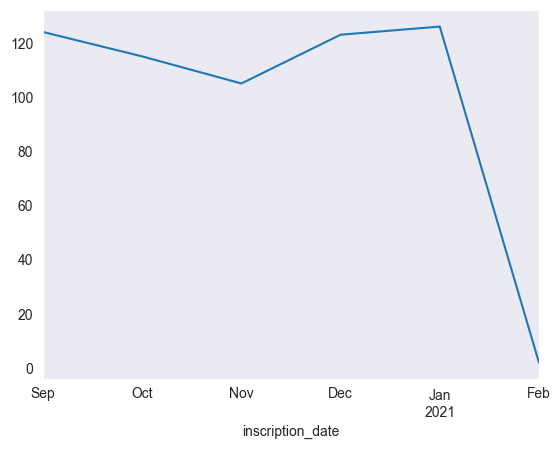

In [ ]:
df_2.set_index('inscription_date').groupby([pd.Grouper(freq="M",)]).size().plot()

In [111]:
sorted(df_1.career.unique())

['actuario',
 'agronomía',
 'arquitectura',
 'bioquímica',
 'ciencias veterinarias',
 'contador público',
 'diseño de imagen y sonido',
 'diseño industrial',
 'farmacia',
 'ingeniería electrónica',
 'ingeniería en informática',
 'ingeniería mecánica',
 'licenciatura en administración',
 'licenciatura en artes',
 'licenciatura en ciencia política',
 'licenciatura en ciencia y tecnología de alimentos',
 'licenciatura en ciencias ambientales',
 'licenciatura en ciencias antropológicas',
 'licenciatura en ciencias biológicas',
 'licenciatura en ciencias de la computación',
 'licenciatura en ciencias de la educación',
 'licenciatura en ciencias geológicas',
 'licenciatura en gestión de agroalimentos',
 'licenciatura en kinesiología y fisiatría',
 'licenciatura en musicoterapia',
 'licenciatura en planificación y diseño del paisaje',
 'licenciatura en producción de bioimagenes',
 'licenciatura en psicología',
 'licenciatura en relaciones del trabajo',
 'licenciatura en sociología',
 'licenci

In [116]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)

### proporción de alumnos por tipo de carrera y género

[Text(0, 0, 'Salud'),
 Text(1, 0, 'Exactas y Naturales'),
 Text(2, 0, 'Sociales'),
 Text(3, 0, 'Artes y Diseño'),
 Text(4, 0, 'Ciencias Empresariales')]

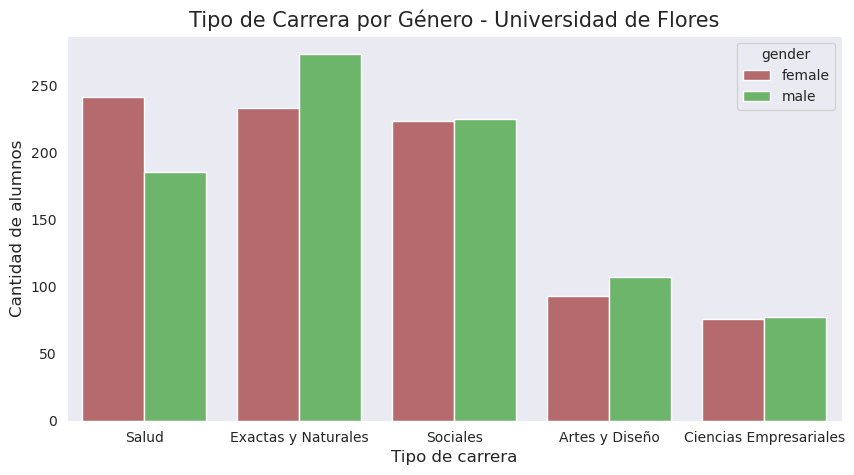

In [127]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[4],
                    colors_green[0]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12})
g.set_xlabel('Tipo de carrera',{'fontsize':12})
g.set_xticklabels(labels=g.get_xticklabels())


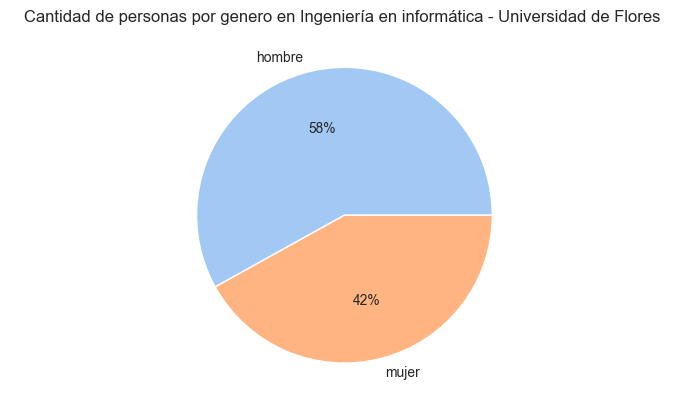

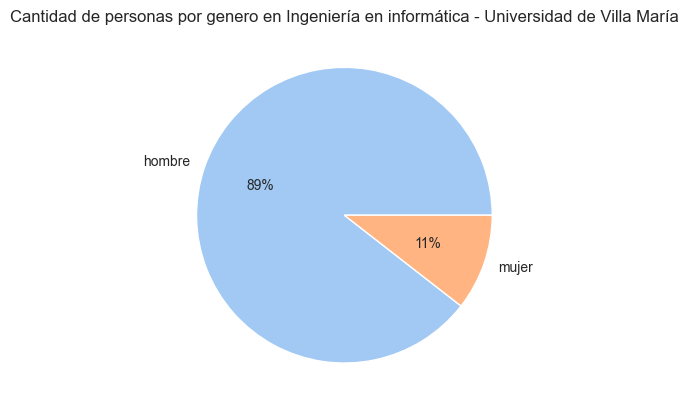

In [ ]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['hombre', 'mujer']
plt.pie(df_aux, colors = colors, labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = colors, labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


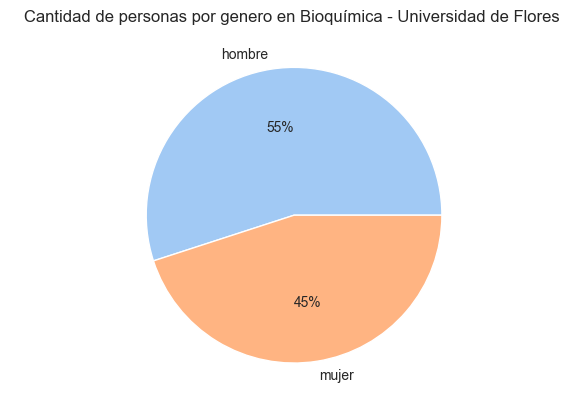

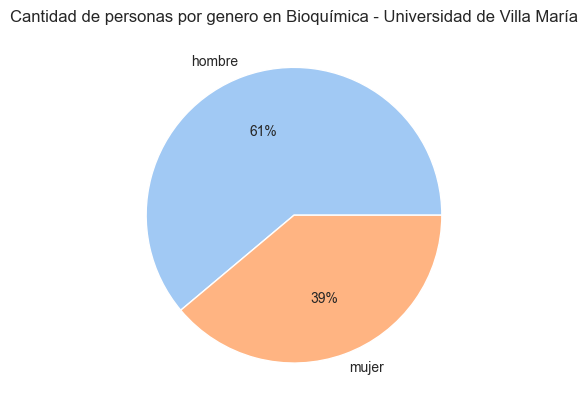

In [ ]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['hombre', 'mujer']
plt.pie(df_aux, colors = colors, labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = colors, labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

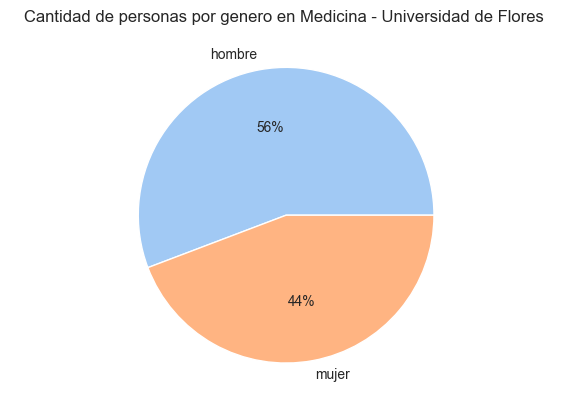

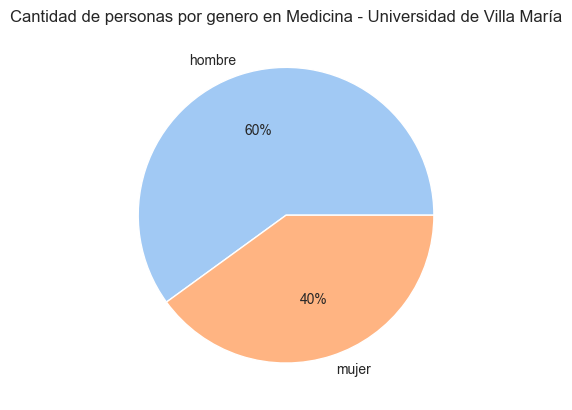

In [ ]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['hombre', 'mujer']
plt.pie(df_aux, colors = colors, labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = colors, labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()